In [136]:
with open("/home/srchand/resnet_100_hex.log", 'rb') as myfile:
    file_line = myfile.readlines()

In [122]:
file_line

[b'0d 0a 0c 26 3c 0d 0a 01 26 4c 0d 0a 0a 26 70 0d 0a 13 25 f4 0d 0a 08 26 04 0d 0a 11 24 fc 0d 0a 06 24 94 0d 0a 0f 23 b4 0d 0a 04 23 24 0d 0a 0d 22 bc 0d 0a 02 22 18 0d 0a 0b 22 00 0d 0a 00 21 e8 0d 0a 09 21 6c 0d 0a 12 21 18 0d 0a 07 21 6b 0d 0a 10 21 88 0d 0a 05 21 48 0d 0a 0e 21 bc 0d 0a 03 21 cc 0d 0a 0c 20 4c 0d 0a 01 1f 6c 0d 0a 0a 1f 6a 0d 0a 13 1f 4e 0d 0a 08 1f 70 0d 0a 11 1f 34 0d 0a 06 1e f4 0d 0a 0f 1e dc 0d 0a 04 1f 50 0d 0a 0d 1e ac 0d 0a 02 1f 0c 0d 0a 0b 1e 7c 0d 0a 00 1e 50 0d 0a 09 1e 60 0d 0a 12 1d a8 0d 0a 07 1d 04 0d 0a 10 1d 28 0d 0a 05 1d 24 0d 0a 0e 1c 6c 0d 0a 03 1c 68 0d 0a 0c 1c 3c 0d 0a 01 1c 10 0d 0a 0a 1b 44 0d 0a 13 1b 40 0d 0a 08 1a c4 0d 0a 11 19 80 0d 0a 06 18 f0 0d 0a 0f 18 9c 0d 0a 04 18 ac 0d 0a 0d 18 08 0d 0a 02 17 8c 0d 0a 0b 17 b1 0d 0a 00 17 8f 0d 0a 09 16 b8 0d 0a 12 17 2c 0d 0a 07 16 4c 0d 0a 10 16 48 0d 0a 05 16 30 0d 0a 0e 15 64 0d 0a 03 14 df 0d 0a 0c 15 41 0d 0a 01 15 30 0d 0a 0a 14 dc 0d 0a 13 14 b0 0d 0a 08 14 5c 0d 0a 11 14 80 0d 0a 0

In [137]:
byte_arrs = file_line[0].split(b'0d 0a')

In [138]:
ro_values = []
for arr in byte_arrs:
    if len(arr) == 10:
        ro_values.append(int(b'0x'+b''.join(arr.split(b' ')),16))

In [132]:
ro_values

[1203080,
 482380,
 1072200,
 351280,
 941120,
 220280,
 810000,
 89200,
 679073,
 1268900,
 548120,
 1138160,
 417280,
 1007280,
 286560,
 876353,
 155520,
 745420,
 24564,
 614360,
 1204160,
 483260,
 1073160,
 352380,
 942300,
 221480,
 811360,
 90660,
 680540,
 1270280,
 549360,
 1139240,
 418400,
 1008320,
 287666,
 877660,
 156660,
 746500,
 25760,
 615520,
 1205520,
 484800,
 1074660,
 353860,
 943720,
 222852,
 812700,
 91920,
 681920,
 1271780,
 550740,
 1140260,
 419400,
 1009260,
 288480,
 878300,
 157360,
 747160,
 26180,
 615940,
 1205740,
 484840,
 1074817,
 353920,
 943680,
 222780,
 812380,
 91600,
 681340,
 1271273,
 550200,
 1140124,
 419160,
 1009140,
 288260,
 878100,
 157260,
 747140,
 26320,
 616140,
 1206129,
 485380,
 1075360,
 354320,
 944100,
 223220,
 813260,
 92320,
 681880,
 1271780,
 550960,
 1140720,
 419900,
 1009860,
 288940,
 878880,
 158080,
 747820,
 26880,
 616800,
 1206640,
 485720,
 1075580,
 354700,
 944640,
 223740,
 813660,
 92840,
 682700,
 12

In [139]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [140]:
df = pd.DataFrame(ro_values)

array([<AxesSubplot:>], dtype=object)

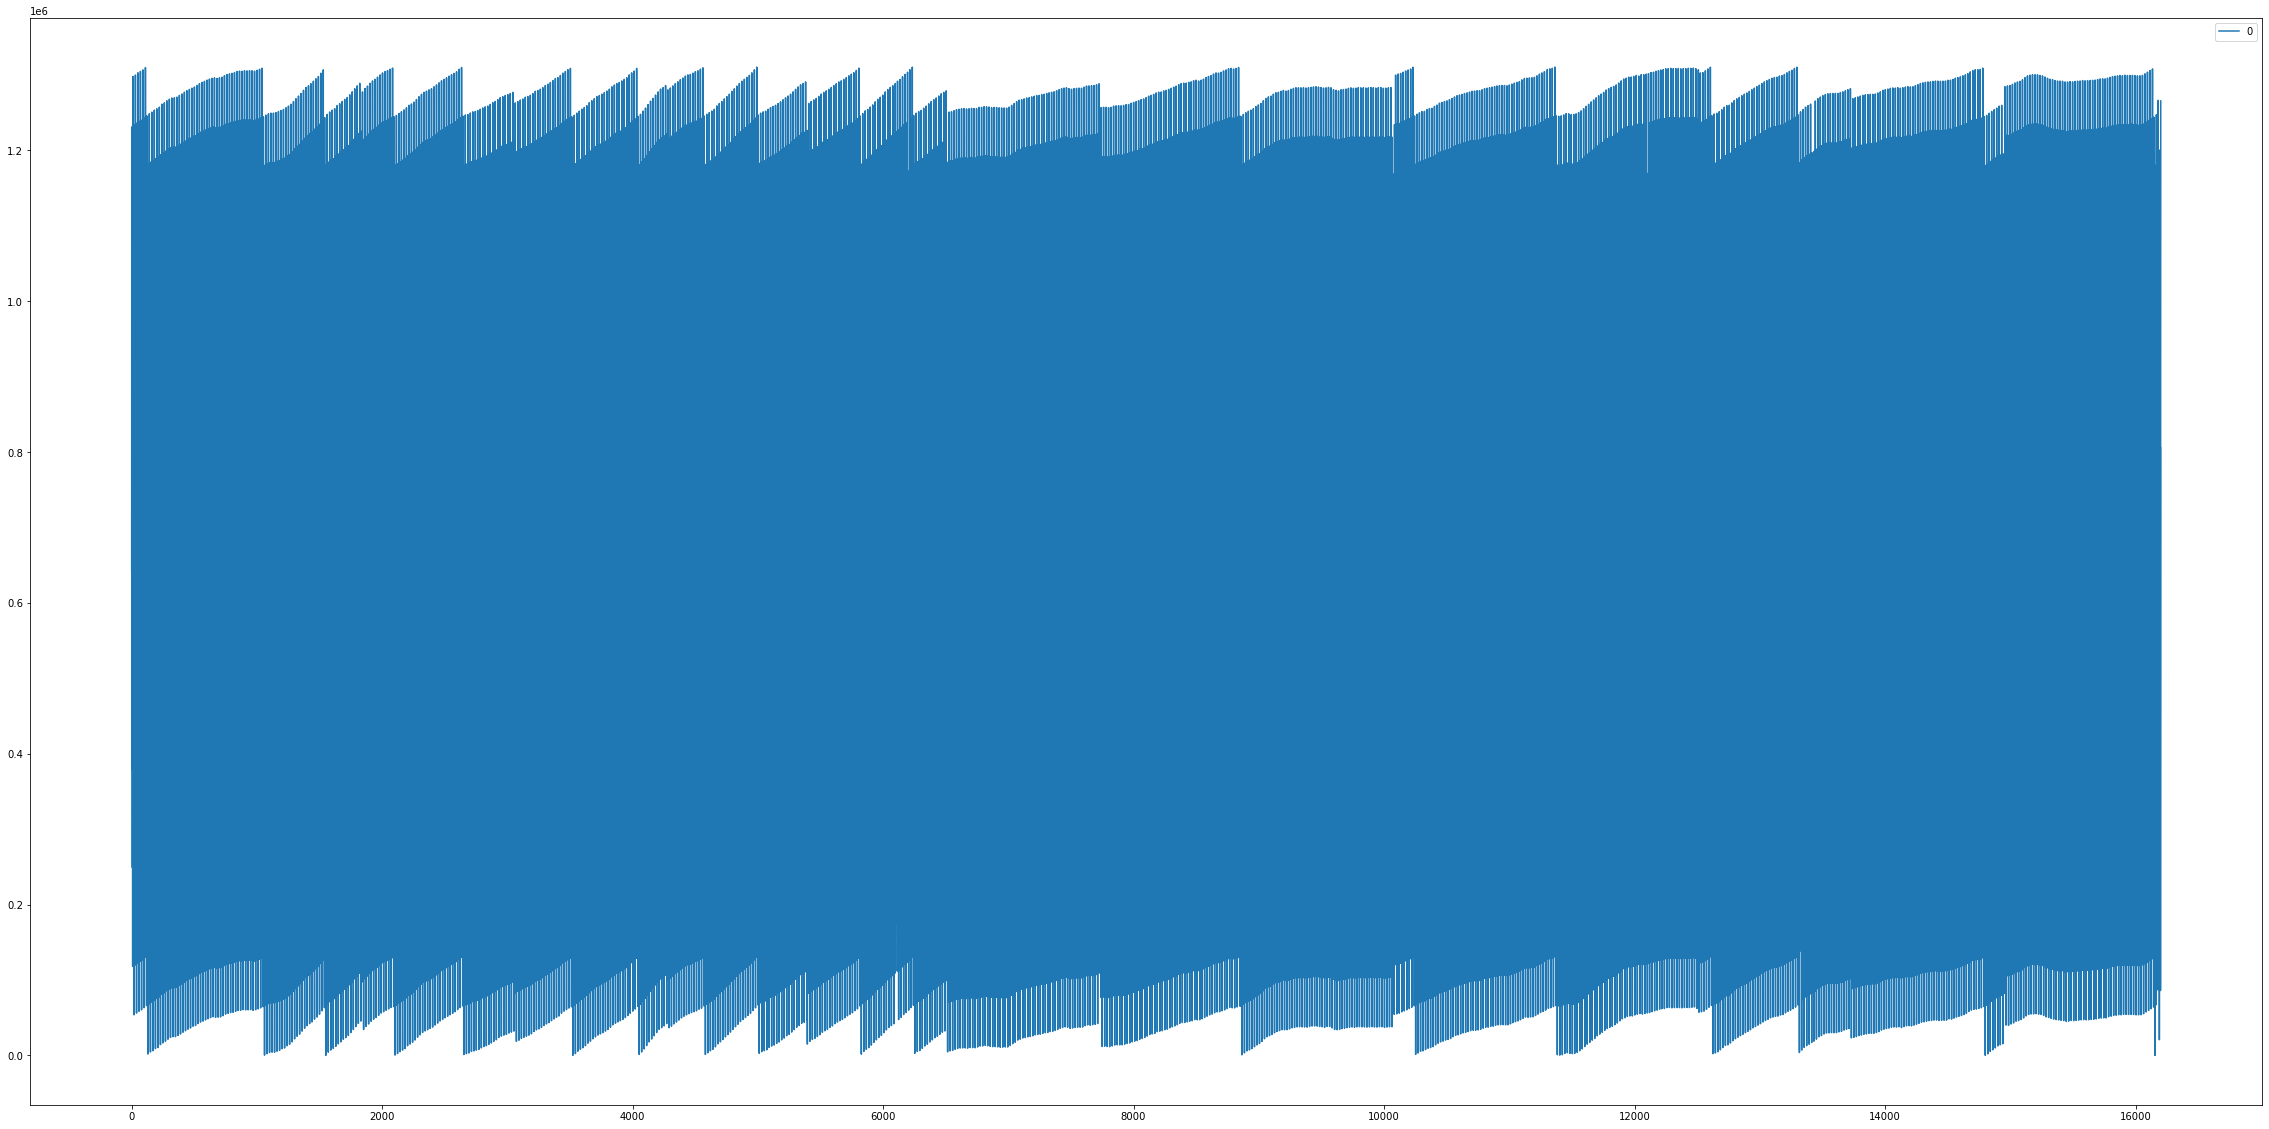

In [141]:
df.plot(subplots=True, figsize=(40,20))

In [69]:
from pandas.plotting import autocorrelation_plot
import seaborn as sns

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

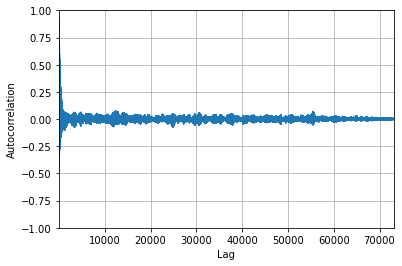

In [70]:
autocorrelation_plot(df)

In [71]:
from statsmodels.tsa.seasonal import seasonal_decompose

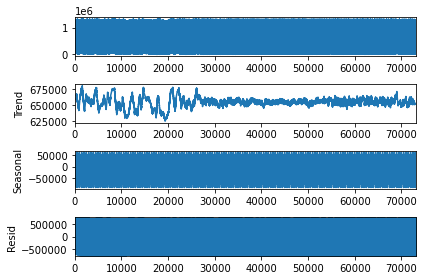

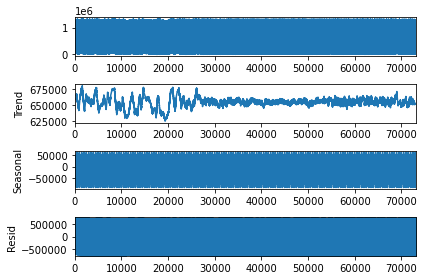

In [72]:
decompose = seasonal_decompose(df,model='additive', period=500)
decompose.plot()

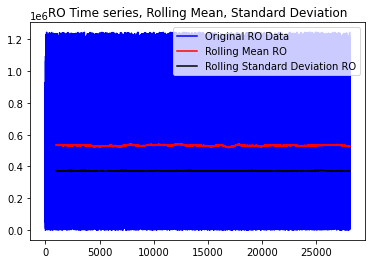

In [49]:
rolling_mean = df.rolling(1000).mean()
rolling_std = df.rolling(1000).std()

plt.plot(df, color="blue",label="Original RO Data")
plt.plot(rolling_mean, color="red", label="Rolling Mean RO")
plt.plot(rolling_std, color="black", label = "Rolling Standard Deviation RO")
plt.title("RO Time series, Rolling Mean, Standard Deviation")
plt.legend(loc="best")